# Data Analytics - ML25M 

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed)
random.seed(seed)


## Data Acquisition

In [2]:
movies_df = pd.read_csv('./ml-25m/movies.csv')
genres = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres], axis=1)
movies_genres = movies_df.copy()
movies_genres.drop('genres', axis=1, inplace=True)


movies_df.drop('genres', axis=1, inplace=True)
movies_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
scores_df = pd.read_csv('./ml-25m/genome-scores.csv')
tags_df = pd.read_csv('./ml-25m/genome-tags.csv')
ratings_df = pd.read_csv('./ml-25m/ratings.csv')

df = movies_df.merge(scores_df, on='movieId')
df = df.merge(tags_df, on='tagId')
df = df.pivot_table(index=['movieId', 'title'], columns='tag', values='relevance', fill_value=0).reset_index().rename_axis(None, axis=1)

# average rating for each movie
ratings_df = ratings_df.groupby(['movieId'])['rating'].mean().reset_index()
df = ratings_df.merge(df, on='movieId')

movies_genres = movies_genres.merge(ratings_df, on='movieId')
movies_genres.drop('movieId', axis=1, inplace=True)

# movieId and title are not needed for the model
movies = df.copy()
df.drop(['movieId', 'title'], axis=1, inplace=True)

In [4]:
df.to_csv('./dataset.csv', index=False)

# Data Visualization

In [5]:
print(f'Number of samples: {df.shape[0]}')
df.describe()

Number of samples: 13816


,rating,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
count,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,...,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000,13816.000000
mean,3.272180,0.046596,0.044771,0.078292,0.085599,0.129250,0.088348,0.074092,0.180610,0.096887,...,0.117631,0.043644,0.048769,0.062500,0.245069,0.097053,0.041831,0.042961,0.125901,0.031766
std,0.484078,0.071478,0.062601,0.111595,0.086021,0.146648,0.105167,0.100385,0.140021,0.134208,...,0.136072,0.083196,0.146318,0.083094,0.122572,0.089406,0.074281,0.135702,0.104373,0.084668
min,0.899038,0.007000,0.007250,0.006000,0.010000,0.017250,0.004250,0.004500,0.015250,0.002250,...,0.009250,0.004000,0.002500,0.003500,0.039750,0.006750,0.005250,0.001500,0.034750,0.007750
25%,2.986574,0.025750,0.026750,0.028750,0.037250,0.053250,0.029500,0.024500,0.079750,0.024750,...,0.052000,0.017250,0.011000,0.022500,0.160250,0.042000,0.021500,0.008500,0.081500,0.016500
50%,3.340420,0.033750,0.034750,0.042000,0.056000,0.078250,0.052750,0.041500,0.137750,0.047750,...,0.072250,0.022500,0.015250,0.039750,0.216500,0.069000,0.028000,0.012250,0.097500,0.019000
75%,3.629630,0.045312,0.047250,0.079500,0.102250,0.136000,0.101500,0.078750,0.235750,0.107250,...,0.118250,0.034000,0.024000,0.074000,0.296250,0.119000,0.038312,0.020000,0.126000,0.023500
max,4.483096,0.999750,1.000000,0.997750,0.922000,0.988000,0.920000,0.913500,0.925500,0.987000,...,0.999250,0.981000,0.999000,0.992750,0.972500,0.974750,1.000000,0.995250,0.992250,0.994250


In [6]:
# mean, median, and standard deviation of ratings with two decimal places
print(f'Mean: {df["rating"].mean():.3f}')
print(f'Median: {df["rating"].median():.3f}')
print(f'Standard deviation: {df["rating"].std():.3f}')



Mean: 3.272
Median: 3.340
Standard deviation: 0.484


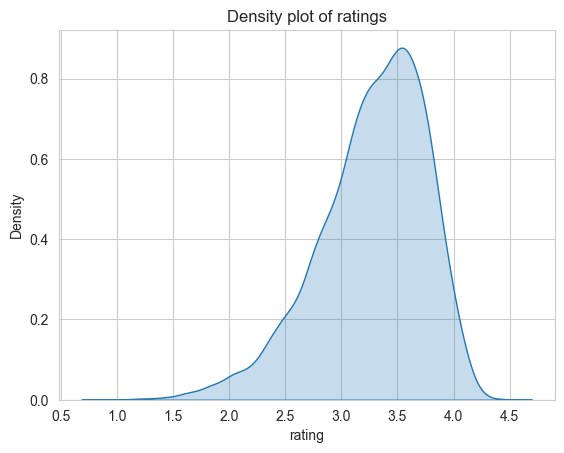

In [7]:
#density plot of ratings
sns.set_style('whitegrid')
sns.kdeplot(df['rating'], fill=True)
plt.title('Density plot of ratings')
plt.show()


In [9]:
#loonking for missing values and duplicates
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplicates: {df.duplicated().sum()}')


Missing values: 0
Duplicates: 0


In [10]:
# compare rating distribution with gaussian distribution
# Kolmogorov-Smirnov test,
# Null hypothesis: the two distributions are identical
# p-value < 0.05: reject the null hypothesis

from scipy.stats import kstest, norm




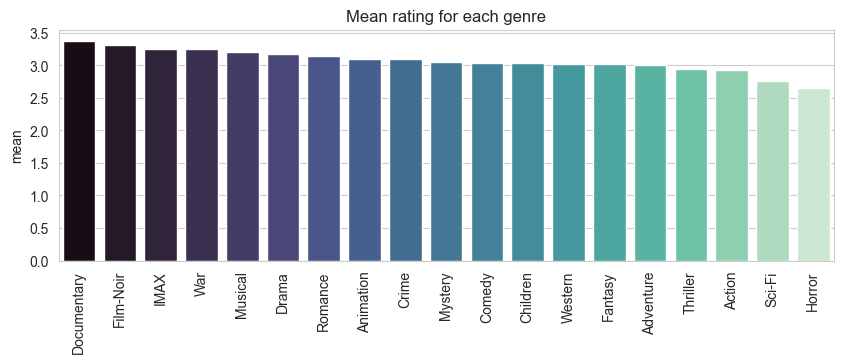

In [17]:
#mean rating for each genre
genres = movies_genres.columns[2:-1]
genres_mean = []
    
for genre in genres:
    genres_mean.append(movies_genres[movies_genres[genre] == 1]['rating'].mean())

genres_mean = pd.DataFrame(genres_mean, index=genres, columns=['mean'])
genres_mean.sort_values(by='mean', ascending=False, inplace=True)

#barplot of mean rating for each genre
plt.figure(figsize=(10, 3))
sns.barplot(x=genres_mean.index, y=genres_mean['mean'], palette='mako')
plt.title('Mean rating for each genre')
plt.xticks(rotation=90)
plt.show()



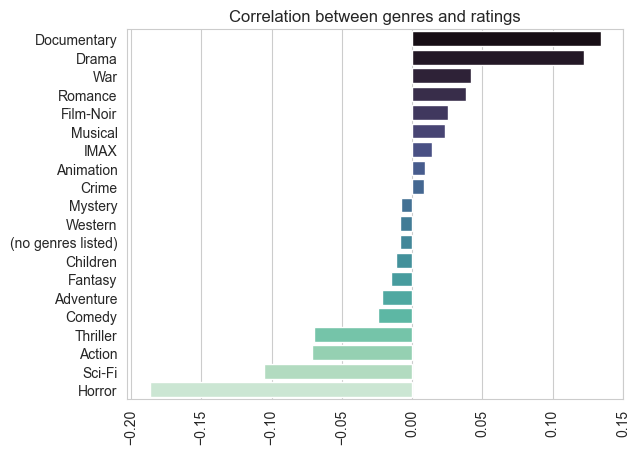

In [23]:
#calculate the correlation between genres and ratings

corr = movies_genres.corr(numeric_only=True)
corr = corr['rating'].sort_values(ascending=False)
corr = corr[1:]
#barplot of correlation between genres and ratings

sns.barplot(x=corr.values, y=corr.index, palette='mako')
plt.title('Correlation between genres and ratings')
plt.xticks(rotation=90)
plt.show()


In [25]:
## Correlation between tags and ratings
# features correlation
corre = df.corr()
corre = corre['rating'].sort_values(ascending=False)
corre = corre.drop('rating')




C:\Users\franc\AppData\Local\Temp\ipykernel_18788\2937208987.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


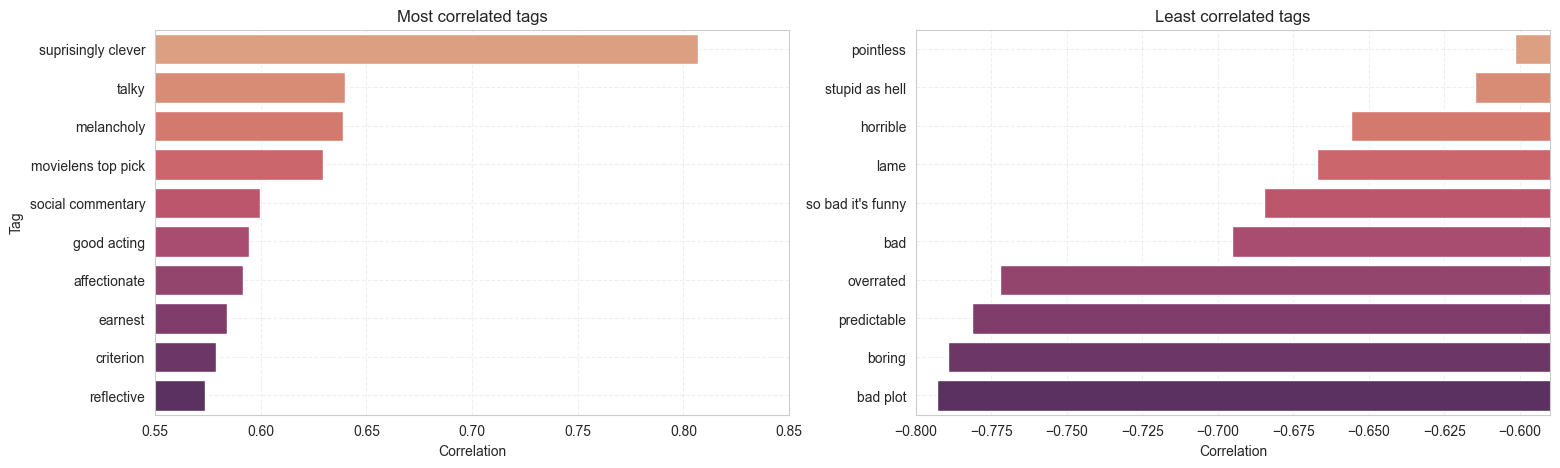

In [32]:
plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=corre.values[:10], y=corre.index[:10], palette='flare', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Most correlated tags')
plt.xlabel('Correlation')
plt.ylabel('Tag')
plt.xlim(0.55, 0.85)

plt.subplot(1, 2, 2)
sns.barplot(x=corre.values[-10:], y=corre.index[-10:], palette='flare', zorder=2)
plt.grid(True, zorder=-1, linestyle='--', alpha=0.3)
plt.title('Least correlated tags')
plt.xlabel('Correlation')
plt.xlim(-.8, -0.59)
plt.ylabel('')
plt.show()


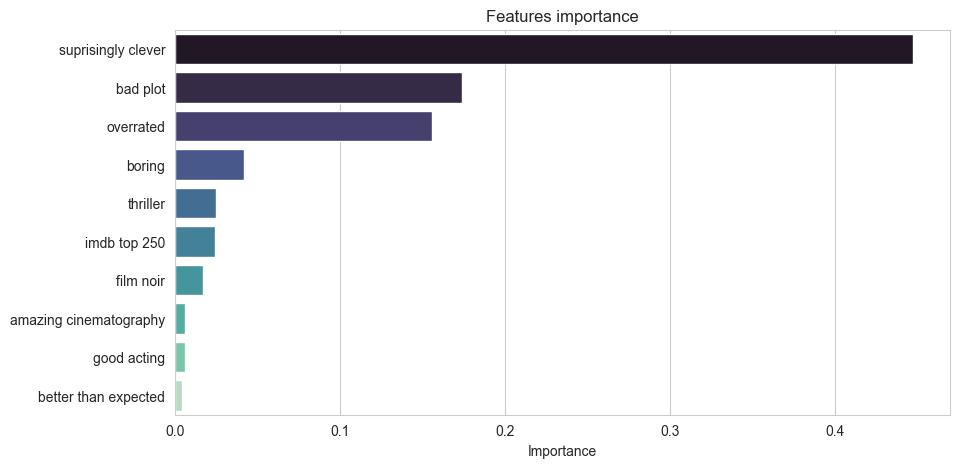

In [35]:
#calculate the features importance
from sklearn.ensemble import RandomForestRegressor

X = df.drop('rating', axis=1)
y = df['rating']

rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_

# sort the features by importance
indices = np.argsort(importance)[::-1]
features = X.columns[indices]
indices = indices[:10]
features = features[:10]
# plot the features importance
plt.figure(figsize=(10, 5))
plt.title('Features importance')
sns.barplot(x=importance[indices], y=features, palette='mako')
plt.xlabel('Importance')
#plt.xlim([-1, X.shape[1]])
plt.show()


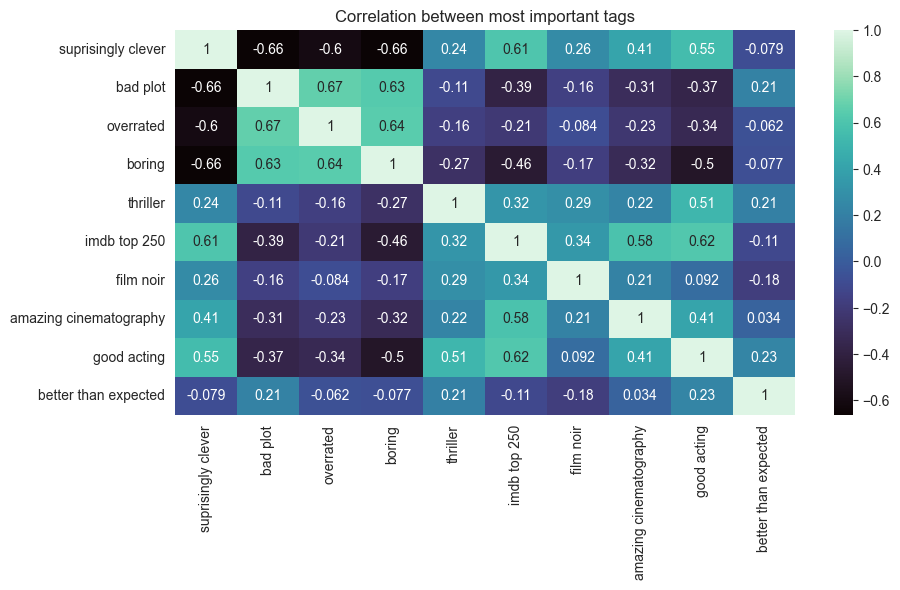

In [36]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='mako')
plt.title('Correlation between most important tags')
plt.show()